In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Volve-production-data.xlsx',sheet_name='Daily Production Data')

In [4]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [5]:
df = df.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM',
       'FLOW_KIND','AVG_ANNULUS_PRESS'], axis=1)

In [6]:
pd.unique(df['WELL_TYPE'])

array(['WI', 'OP'], dtype=object)

In [7]:
# bulled through assignment instead of a cleaner method to code later
#drop NPD_WELL_BORE_NAME later
F1C = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F11H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-11'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F12H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-12'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F14H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-14'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F15D = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F4AH = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-4'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)
F5AH = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-5'].drop(['WELL_TYPE','BORE_WI_VOL'], axis=1)

In [8]:
producers = [F1C, F11H, F12H, F14H, F15D]
for well in producers:
    for column in well:
        nulls = sum(well[column].isnull())
        if nulls > 0:
            print(column, "has", nulls, "null values" )
    print('\n')

AVG_DOWNHOLE_PRESSURE has 3 null values
AVG_DOWNHOLE_TEMPERATURE has 3 null values
AVG_DP_TUBING has 3 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 2 null values
AVG_WHP_P has 6 null values
AVG_WHT_P has 6 null values
DP_CHOKE_SIZE has 6 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 44 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 196 null values






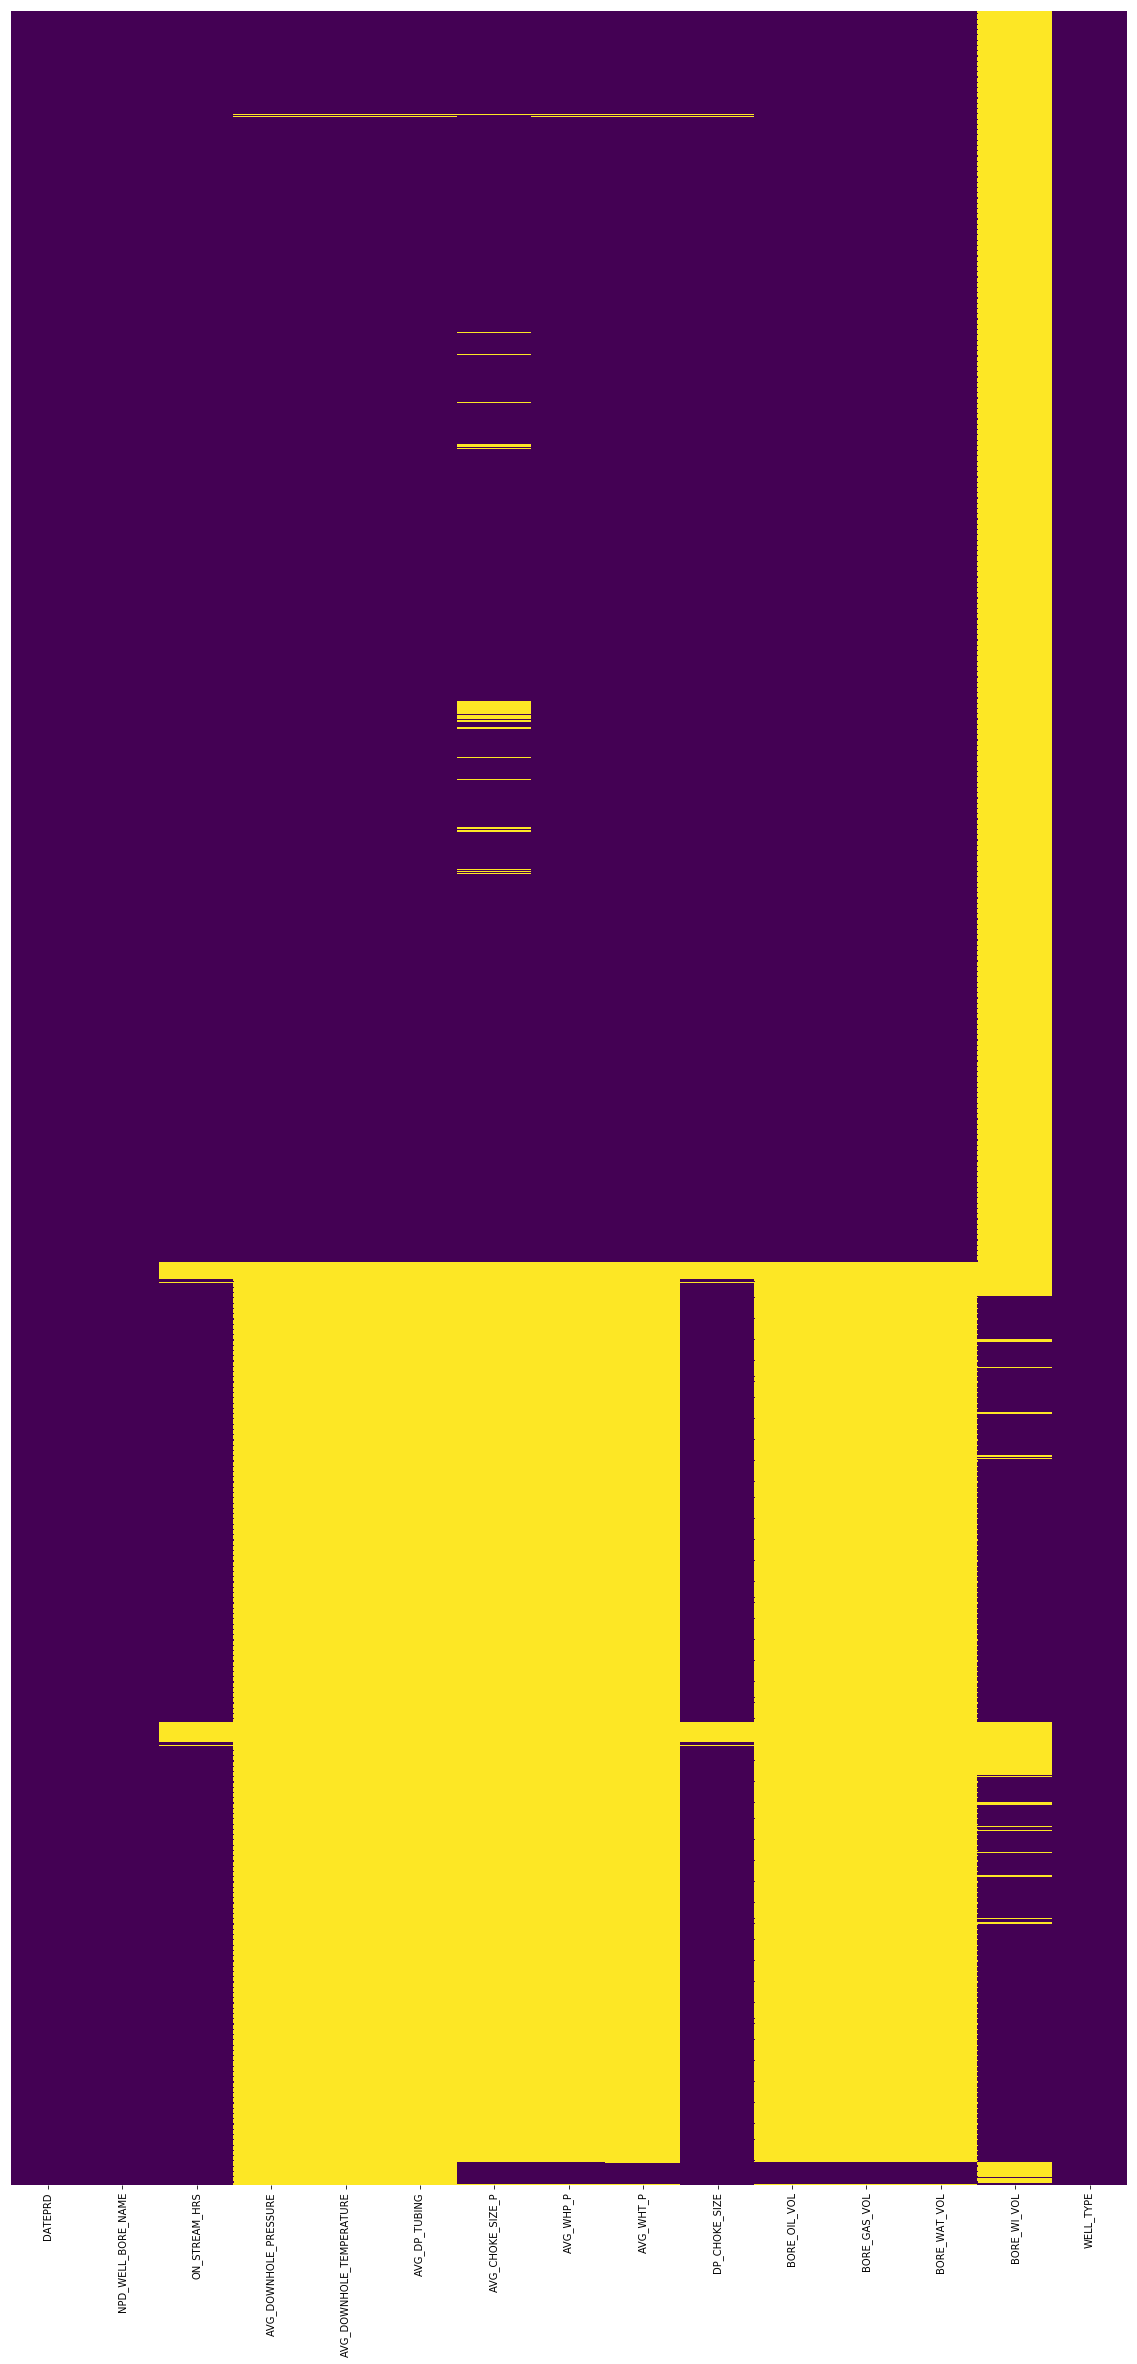

In [9]:
"""sns.set_style("darkgrid")
SMALL_SIZE = 10
MEDIUM_SIZE = 14
LARGE_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LARGE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title """
fig = plt.figure(figsize=(20,40))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

fig.savefig("nulls_heatmap")

In [10]:
#getting rid of nulls, there's enough data points to not need some type of substitution(inserting mean, etc)
for well in producers:
    well = well.dropna(subset=['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE',
                               'AVG_DP_TUBING','AVG_CHOKE_SIZE_P'], inplace=True)

In [11]:
#verifying removal

for well in producers:
    for column in well:
        nulls = sum(well[column].isnull())
        if nulls > 0:
            print(column, "has", nulls, "null values" )
    else: print("no nulls")
    print('\n')

no nulls


no nulls


no nulls


no nulls


no nulls




In [12]:
for well in producers:
    print(len(well))

743
1159
3006
2854
978


In [13]:
# This will change the index to date if ya'll wanna plot any time series stuff
#df.set_index('DATEPRD', inplace=True)


In [14]:
#changes list of each producer dataframe into one continuous dataframe
producers = pd.concat(producers)

In [15]:
producers_date = producers.set_index('DATEPRD')

In [16]:
producers_date.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,,
2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0
2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,281.44744,3.087015,22.05334,8.70429,22.05334,0.0,0.0,0.0
2014-04-13,15/9-F-1 C,0.0,303.53481,96.95885,276.03200,1.962365,27.50281,9.42315,16.16326,0.0,0.0,0.0
2014-04-14,15/9-F-1 C,0.0,303.78228,96.96873,282.78676,0.000000,20.99552,8.13137,20.73712,0.0,0.0,0.0


<br>

<center>looking at zeroes</center>

In [17]:
len(F12H[F12H['AVG_DOWNHOLE_PRESSURE'] == 0])

2080

In [18]:
len(F12H)

3006

In [19]:
2165/8740

0.2477116704805492

<strong><center>2080 of the 2165 zeroes for avg downhole pressure and avg downhole temp are from F12H, <br>
removing would lose 70% of the rows from F12H</center></strong> 

# <center>the following cleaning/analysis will be just for F1C</center>

<BR>

<BR>

In [20]:
#line plot of oil vs time

"""
plt.figure(figsize=(20,20))
plt.ylabel('Oil Production')
producers_date.BORE_OIL_VOL[producers_date['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'].plot()

"""

"\nplt.figure(figsize=(20,20))\nplt.ylabel('Oil Production')\nproducers_date.BORE_OIL_VOL[producers_date['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'].plot()\n\n"

In [21]:
for column in F1C.drop(['DATEPRD','NPD_WELL_BORE_NAME'], axis=1):
    print(column)
    print(sum(F1C[column]==0))
    print('\n')

ON_STREAM_HRS
305


AVG_DOWNHOLE_PRESSURE
2


AVG_DOWNHOLE_TEMPERATURE
2


AVG_DP_TUBING
2


AVG_CHOKE_SIZE_P
171


AVG_WHP_P
6


AVG_WHT_P
2


DP_CHOKE_SIZE
3


BORE_OIL_VOL
313


BORE_GAS_VOL
313


BORE_WAT_VOL
344




In [22]:
# ON STREAM HOURS HAD A BUNCH OF MINISCULE VALUES AND A 25hr DAY, DATA LOOKS MUCH BETTER WITH ONLY 
# USING 24 HR DAYS
F1C = F1C[F1C['ON_STREAM_HRS'] == 24]

In [23]:
for column in F1C.drop(['DATEPRD','NPD_WELL_BORE_NAME'],axis=1):
    F1C[column] = F1C[column].apply(lambda x: np.sqrt(x))

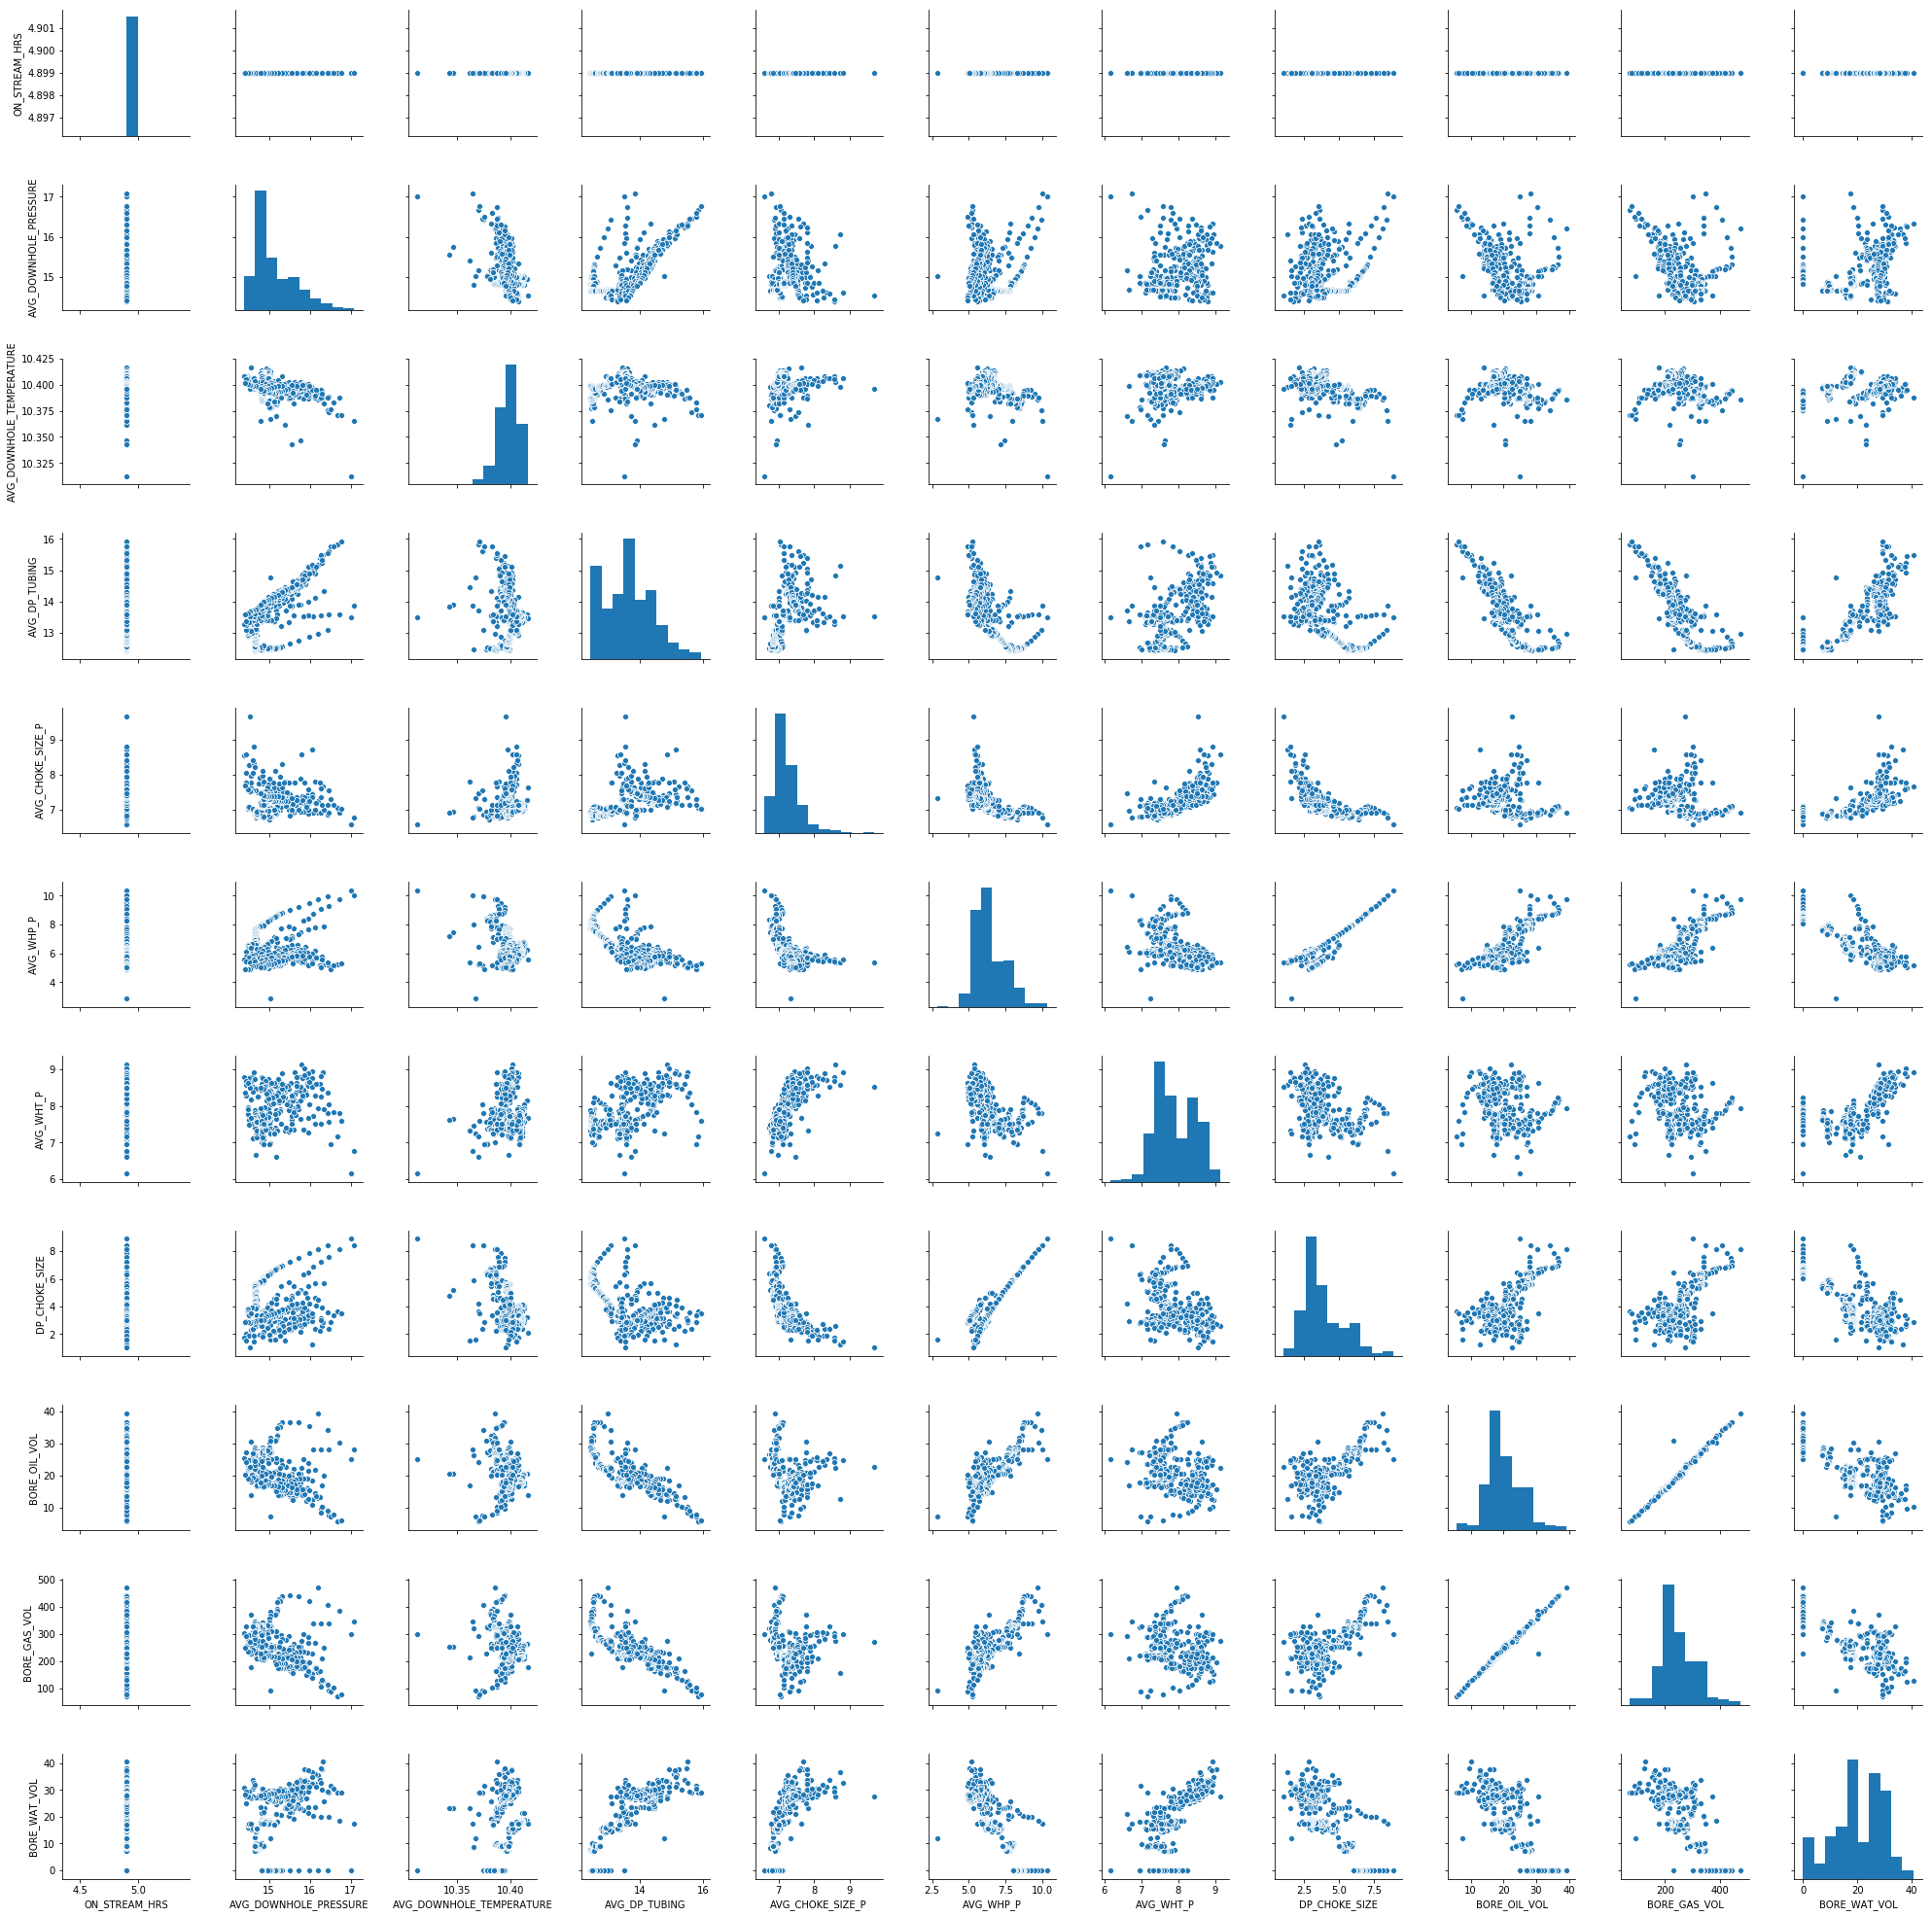

In [24]:
pairplot = sns.pairplot(F1C)
pairplot.savefig("F1C_pairplot.png")

In [25]:
"""
plt.figure(figsize=(20,10))
#sns.scatterplot(data=producers_date.BORE_OIL_VOL[producers_date['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'])
plt.scatter(x=F1C.index, 
            y=F1C['BORE_OIL_VOL'])
"""

"\nplt.figure(figsize=(20,10))\n#sns.scatterplot(data=producers_date.BORE_OIL_VOL[producers_date['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'])\nplt.scatter(x=F1C.index, \n            y=F1C['BORE_OIL_VOL'])\n"

In [26]:
#sum(F1C['BORE_OIL_VOL']==0)

In [27]:
#len(F1C['BORE_OIL_VOL'])

In [28]:
#F1C['BORE_OIL_VOL'].hist()

In [29]:
#sns.distplot(F1C['BORE_OIL_VOL'])

In [30]:
#sns.boxplot(F1C['BORE_OIL_VOL'])

In [31]:
#F1C['BORE_OIL_VOL'].describe()

In [32]:
F1C.set_index('DATEPRD',inplace=True)

## <center>ANN for F1C</center>

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(F1C.drop('NPD_WELL_BORE_NAME',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_F1C = pd.DataFrame(scaler.transform(F1C.drop('NPD_WELL_BORE_NAME', axis=1)),columns=F1C.columns[1:],
                         index=F1C.index)

In [37]:
F1C.columns

Index(['NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
       'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL',
       'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [39]:
plot_losses = PlotLossesKeras(figsize=(10,7))

In [40]:
len(F1C)

387

In [41]:
#with scaling
#X = scaled_F1C.iloc[:,0:11].drop('BORE_OIL_VOL',axis=1)#scaled_F1C.drop(['BORE_OIL_VOL'], axis=1)
#y = scaled_F1C.iloc[:,8]

#without scaling
X = F1C.iloc[:,0:12].drop(['NPD_WELL_BORE_NAME','BORE_OIL_VOL'], axis=1)
y = F1C.iloc[:,9]

In [42]:
y.head()

DATEPRD
2014-04-22    25.129067
2014-04-23    34.153477
2014-04-24    39.367626
2014-04-25    35.336950
2014-04-26    36.684874
Name: BORE_OIL_VOL, dtype: float64

In [43]:
scaled_F1C.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,
2014-04-22,-1.0,3.621569,-7.842112,-0.191517,-1.692796,3.594881,-3.359203,3.483960,0.900896,0.842004,-2.178772
2014-04-23,-1.0,2.511492,-2.045204,-0.727285,-0.939546,3.224575,-0.231011,3.149720,2.582207,2.545848,-2.178772
2014-04-24,-1.0,2.072921,-1.036090,-0.866850,-0.830923,3.010127,0.047439,2.957111,3.553640,3.567455,-2.178772
2014-04-25,-1.0,1.633058,-0.580329,-1.002170,-0.677880,2.789133,0.227129,2.754784,2.802696,2.784356,-2.178772
2014-04-26,-1.0,1.124600,-0.218688,-1.159573,-0.430285,2.532529,0.366566,2.516245,3.053824,3.054918,-2.178772


In [44]:
X_train = F1C.iloc[0:233,0:12].drop(['NPD_WELL_BORE_NAME','BORE_OIL_VOL'], axis=1)
y_train = F1C.iloc[0:233,9]

X_validate = F1C.iloc[233:310,0:12].drop(['NPD_WELL_BORE_NAME','BORE_OIL_VOL'], axis=1)
y_validate = F1C.iloc[233:310,9]

X_test = F1C.iloc[310:,0:12].drop(['NPD_WELL_BORE_NAME','BORE_OIL_VOL'], axis=1)
y_test = F1C.iloc[310:,9]

note: pieces of ANN architecture taken from Keras documentation and machine-learning-mastery website

In [45]:
#seed recommended for reproducibility but it jacks up the fit
#i don't understand why
"""
from numpy.random import seed
seed(3)
from tensorflow import set_random_seed
set_random_seed(17)
"""

from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import metrics

In [46]:
model = Sequential()

In [47]:
model.add(Dense(8, input_dim=10))
model.add(Activation('relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [48]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

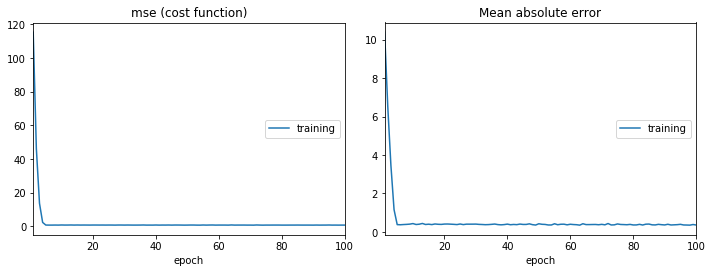

In [49]:
model.fit(X_train, y_train, epochs=100, batch_size=20, callbacks=[plot_losses])

In [50]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f" % (model.metrics_names[1], scores[1]))

233/233 [==============================] - 0s 153us/step

mean_absolute_error: 0.31


In [51]:
plot_losses.params

{'batch_size': 20,
 'epochs': 100,
 'steps': None,
 'samples': 233,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'mean_absolute_error']}

In [52]:
#try checking with not normalized data???

In [53]:
trainPredict = model.predict(X_train)
validatePredict = model.predict(X_validate)
testPredict = model.predict(X_test)

In [54]:
F1C['BORE_OIL_VOL'].mean()


20.293524950070413

In [55]:
trainPredict.shape

(233, 1)

In [56]:
trainPredict = pd.DataFrame(trainPredict).set_index(y_train.index)
validatePredict = pd.DataFrame(validatePredict).set_index(y_validate.index)
testPredict = pd.DataFrame(testPredict).set_index(y_test.index)

In [57]:
results = pd.concat([trainPredict,validatePredict,testPredict])

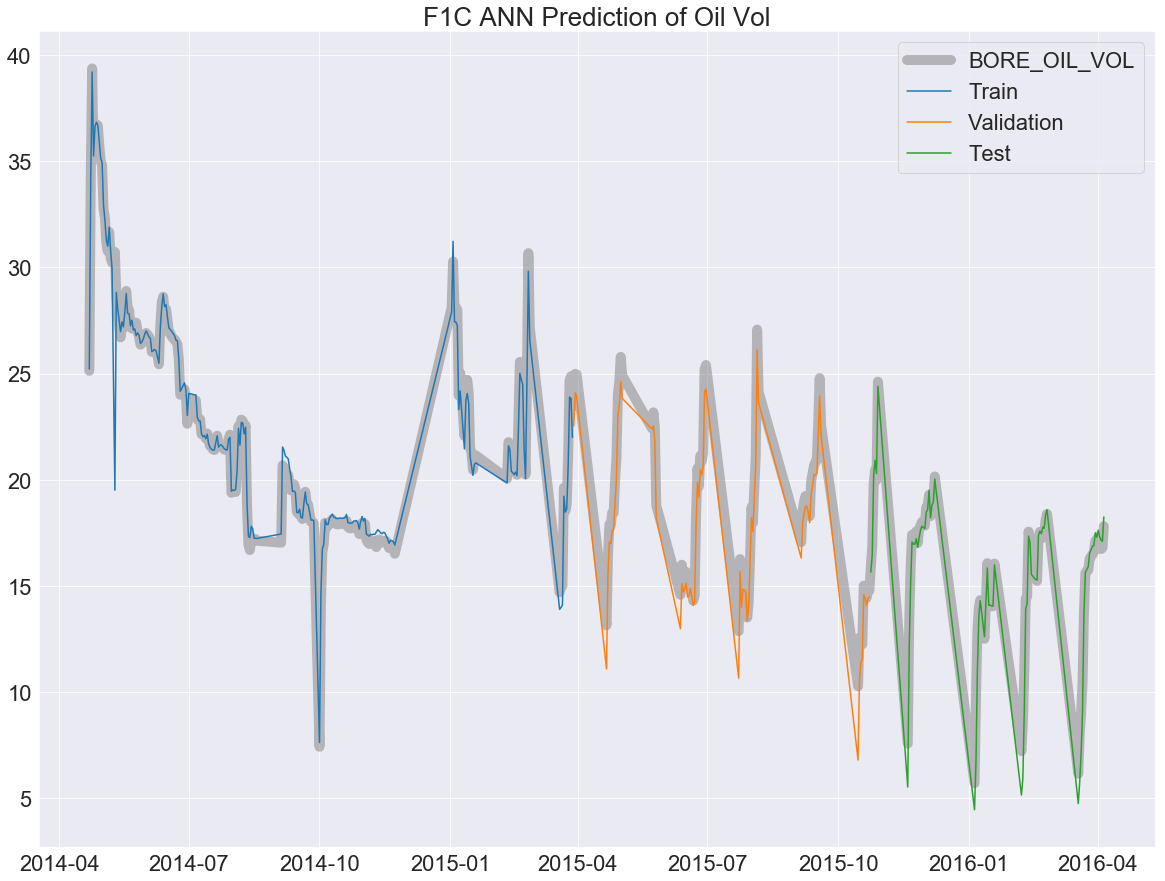

In [58]:
fig = plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
SMALL_SIZE = 10
MEDIUM_SIZE = 14
LARGE_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LARGE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title


plt.plot(F1C['BORE_OIL_VOL'], color='gray',linewidth=10, alpha=0.5)
plt.plot(trainPredict,label='Train',linestyle='-')
plt.plot(validatePredict,label='Validation')
plt.plot(testPredict, label='Test')
plt.legend()
plt.title('F1C ANN Prediction of Oil Vol', size=26)

fig.savefig("F1C_ANN.png")


In [59]:
#pd.concat([y_train,trainPredict], axis=1).plot(figsize=(10,7))

In [60]:
#pd.concat([y_test,testPredict], axis=1).plot(figsize=(20,12))

In [61]:
#pd.concat([y_validate,validatePredict], axis=1).plot(figsize=(20,12))

# Trying to predict for one of the other producers

## F11H

In [62]:
F11H = F11H.set_index('DATEPRD')

In [63]:
F11H = F11H[F11H['ON_STREAM_HRS'] == 24]

In [64]:
for column in F11H.drop('NPD_WELL_BORE_NAME',axis=1):
    F11H[column] = F11H[column].apply(lambda x: np.sqrt(x))

In [65]:
F11H_predict = model.predict(F11H.drop(['NPD_WELL_BORE_NAME','BORE_OIL_VOL'], axis=1))

In [66]:
F11H_predict = pd.DataFrame(F11H_predict).set_index(F11H.index)

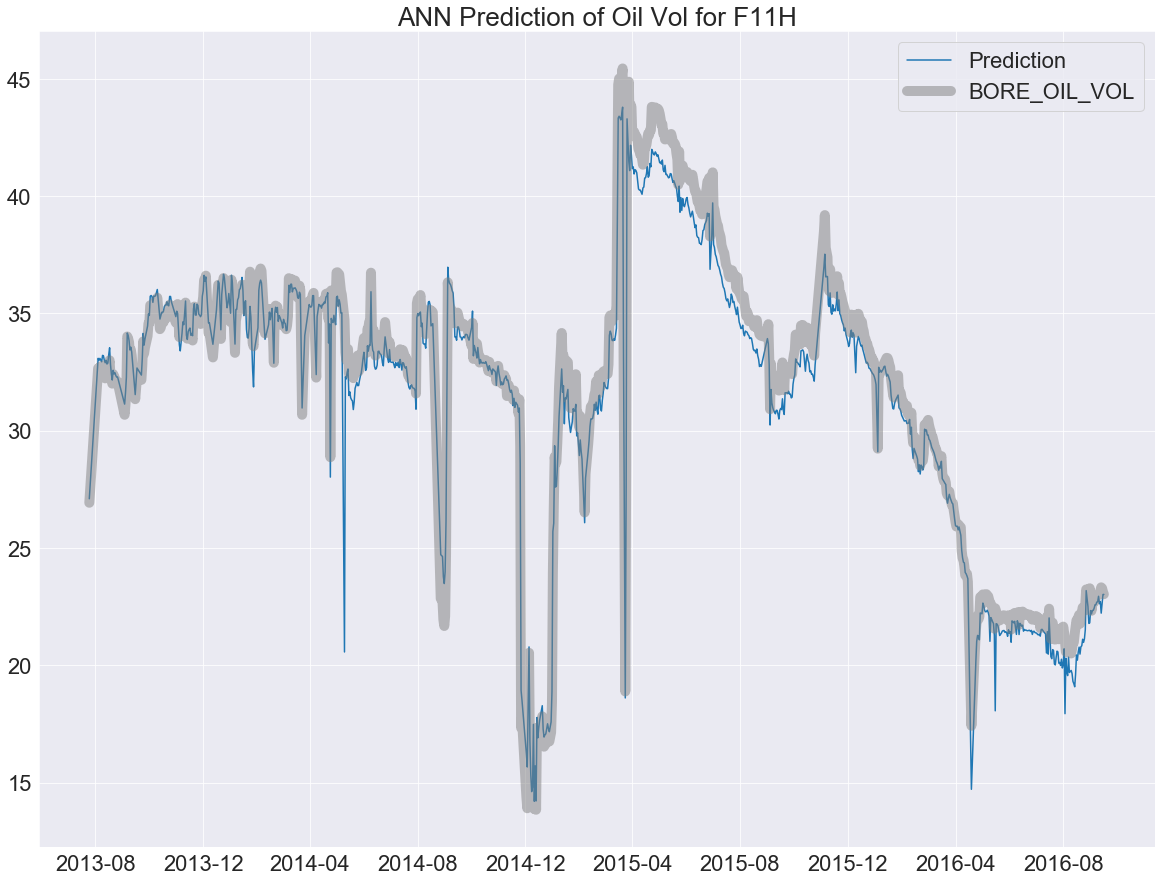

In [67]:
fig = plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
SMALL_SIZE = 10
MEDIUM_SIZE = 14
LARGE_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LARGE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

plt.plot(F11H_predict, label='Prediction')
plt.plot(F11H['BORE_OIL_VOL'],color='gray',linewidth=10, alpha=0.5)
plt.title('ANN Prediction of Oil Vol for F11H', size=26)
plt.legend()

fig.savefig("F11H_ANN")

<br>

# <center>NORMALIZING/SCALING ALL PRODUCERS</center>

In [68]:
producers = producers[producers['ON_STREAM_HRS'] != 0]

In [69]:
scaler.fit(producers.drop(['DATEPRD','NPD_WELL_BORE_NAME'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
#scaled_F1C = pd.DataFrame(scaler.transform(F1C.drop('DATEPRD', axis=1)), columns=F1C.drop('DATEPRD',axis=1).columns)
scaled_producers = scaler.transform(producers.drop(['DATEPRD','NPD_WELL_BORE_NAME'], axis=1))


In [71]:
scaled_producers

array([[-3.26265707,  1.13810207,  0.52613463, ..., -0.93889294,
        -0.97450477, -1.14803086],
       [ 0.27261153,  1.02446667,  0.60776247, ..., -0.46905547,
        -0.49923255, -1.14803086],
       [ 0.27261153,  0.84212986,  0.63641391, ..., -0.07100275,
        -0.103617  , -1.14803086],
       ...,
       [ 0.27261153,  0.12042145,  0.61149545, ..., -0.832689  ,
        -0.85332238, -1.02760167],
       [ 0.27261153,  0.12888221,  0.61117187, ..., -0.83140926,
        -0.85316057, -1.02823974],
       [-1.31825934,  0.12981887,  0.61118188, ..., -0.85980173,
        -0.88234454, -1.0560429 ]])

## <center>Singular Value Decomposition to determine how many principal components</center>

In [72]:
cov_matrix = np.cov(scaled_producers, rowvar=False)

In [73]:
U, s, vh = np.linalg.svd(cov_matrix)

In [74]:
#which input variables have the strongest effect?
pd.DataFrame(U, index=producers.drop(['DATEPRD','NPD_WELL_BORE_NAME'], axis=1).columns)

,0,1,2,3,4,5,6,7,8,9,10
ON_STREAM_HRS,-0.043609,-0.172396,-0.247581,-0.898718,-0.294654,0.005960,0.107430,-0.027115,-0.012003,-0.010334,0.001959
AVG_DOWNHOLE_PRESSURE,0.341321,0.191699,-0.405984,0.098471,-0.102690,-0.049051,-0.010494,0.052593,-0.019356,-0.808781,-0.043623
AVG_DOWNHOLE_TEMPERATURE,0.354208,0.230135,-0.359107,-0.005682,0.032731,0.042939,-0.042412,0.701965,0.138923,0.417796,0.035518
AVG_DP_TUBING,0.267242,0.244760,-0.483127,0.117659,-0.067098,0.014273,0.043486,-0.668528,-0.114068,0.393399,0.010811
AVG_CHOKE_SIZE_P,-0.313089,-0.228770,-0.345793,0.106936,0.010419,-0.786990,-0.305439,0.054085,-0.000586,0.054272,-0.002353
AVG_WHP_P,0.364636,-0.251026,0.221443,0.110937,-0.456067,-0.106472,-0.100229,0.121336,-0.700365,0.088017,-0.017936
AVG_WHT_P,-0.186146,-0.438745,-0.304751,0.312740,-0.157154,0.101646,0.730327,0.114211,0.018068,0.019650,0.002979
DP_CHOKE_SIZE,0.371023,-0.198643,0.242806,0.098790,-0.480255,-0.179617,-0.041993,-0.130488,0.685145,0.045490,0.031271
BORE_OIL_VOL,0.287652,-0.467576,-0.080326,-0.043667,0.395212,0.100560,-0.141686,-0.070708,-0.004076,-0.051362,0.704440
BORE_GAS_VOL,0.285271,-0.472003,-0.084146,-0.042857,0.379548,0.119119,-0.152775,-0.056483,0.052379,0.025268,-0.706228


In [75]:
producers.drop(['DATEPRD','NPD_WELL_BORE_NAME'], axis=1).columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')

In [76]:
sum(s)

11.00139682539683

In [77]:
s

array([4.67257691e+00, 2.34901464e+00, 2.13815419e+00, 9.22474590e-01,
       5.00830430e-01, 2.23504287e-01, 1.54200292e-01, 2.36879935e-02,
       1.22554141e-02, 3.32919657e-03, 1.36888963e-03])

In [78]:
(s[0]+s[1]+s[2]+s[3])/(sum(s))

0.9164491093860877

In [79]:
total = sum(s)
numerator = 0
for i in range(0,10):
    numerator = numerator + s[i]
    percent = round((numerator / total * 100),2)
    print('PC',i + 1,percent,'%')

PC 1 42.47 %
PC 2 63.82 %
PC 3 83.26 %
PC 4 91.64 %
PC 5 96.2 %
PC 6 98.23 %
PC 7 99.63 %
PC 8 99.85 %
PC 9 99.96 %
PC 10 99.99 %


<strong>4 principal components account for 91% of the variance</strong>

<br>

# <center>PCA </center>

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=4)

In [82]:
pca.fit(scaled_producers)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
x_pca = pca.transform(scaled_producers)

In [84]:
x_pca

array([[ 3.85137067,  2.58911264,  3.02791138,  2.45848335],
       [ 3.87064889,  0.58801563,  1.94814065, -0.29014173],
       [ 3.39275819, -0.24220567,  1.37586772, -0.03868518],
       ...,
       [-0.14086364,  2.60046211,  0.11484261, -1.13219475],
       [-0.13440081,  2.61348078,  0.10725128, -1.13553874],
       [ 0.00592418,  2.98887671,  0.60332882,  0.2525112 ]])

In [85]:
scaled_producers.shape

(7876, 11)

In [86]:
x_pca.shape

(7876, 4)

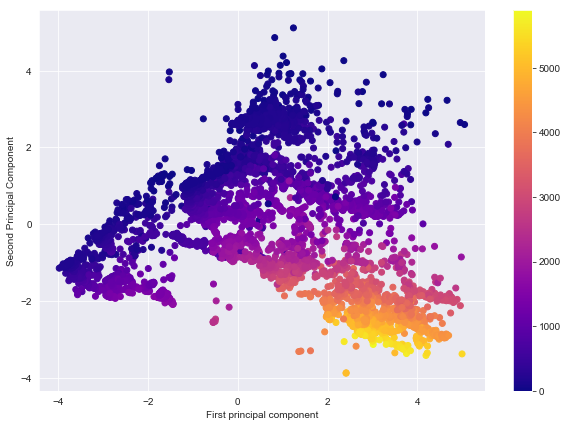

In [87]:
#unnecessary graph that looks pretty
plt.figure(figsize=(10,7))
plt.style.use('default')
sns.set_style('darkgrid')
plt.scatter(x_pca[:,0],x_pca[:,1], c= producers['BORE_OIL_VOL'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar()

In [88]:
princomps = pd.DataFrame(x_pca, columns=['PC1','PC2','PC3','PC4'],index=producers.index)
princomps.head()

,PC1,PC2,PC3,PC4
14,3.851371,2.589113,3.027911,2.458483
15,3.870649,0.588016,1.948141,-0.290142
16,3.392758,-0.242206,1.375868,-0.038685
17,3.310299,-0.484171,1.211048,-0.085834
18,2.935932,-0.221815,1.141150,-0.101844


<br>

# <center>Kmeans</center>

In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans = KMeans(n_clusters=4)

In [91]:
princomps.columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [92]:
kmeans.fit(princomps)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
kmeans.labels_

array([3, 3, 2, ..., 3, 3, 3])

In [94]:
princomps['Cluster'] = kmeans.labels_

In [95]:
princomps.head()

,PC1,PC2,PC3,PC4,Cluster
14,3.851371,2.589113,3.027911,2.458483,3
15,3.870649,0.588016,1.948141,-0.290142,3
16,3.392758,-0.242206,1.375868,-0.038685,2
17,3.310299,-0.484171,1.211048,-0.085834,2
18,2.935932,-0.221815,1.141150,-0.101844,2


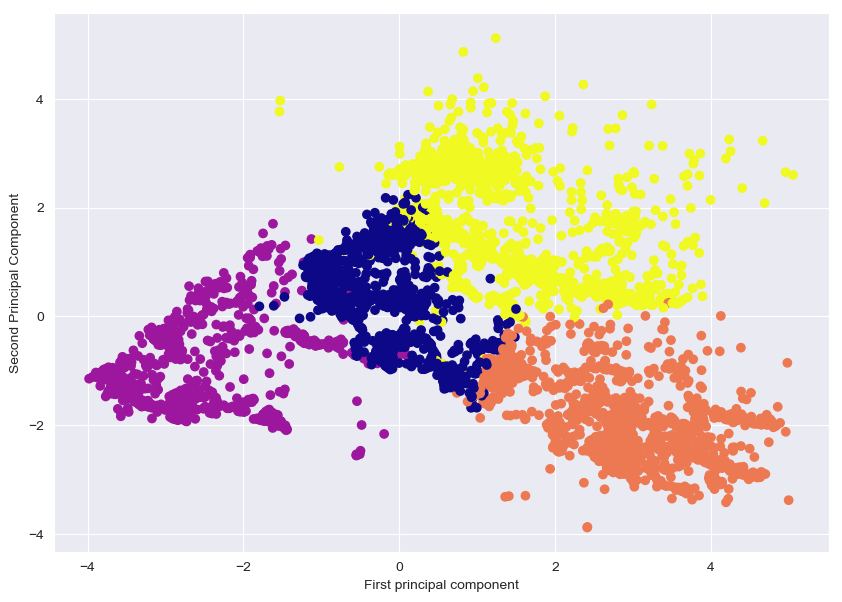

In [96]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x_pca[:,0],x_pca[:,1], c= princomps['Cluster'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
fig.savefig('cluster1')

In [97]:
producers.iloc[2872]

DATEPRD                     2012-01-19 00:00:00
NPD_WELL_BORE_NAME                    15/9-F-12
ON_STREAM_HRS                                24
AVG_DOWNHOLE_PRESSURE                         0
AVG_DOWNHOLE_TEMPERATURE                      0
AVG_DP_TUBING                           40.7022
AVG_CHOKE_SIZE_P                        62.8485
AVG_WHP_P                               40.7022
AVG_WHT_P                               89.5101
DP_CHOKE_SIZE                           9.05632
BORE_OIL_VOL                            1144.71
BORE_GAS_VOL                             168235
BORE_WAT_VOL                            3942.14
Name: 3296, dtype: object

In [98]:
princomps['Well'] = producers['NPD_WELL_BORE_NAME']

In [99]:
princomps[princomps['Cluster']==0]['Well'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14'], dtype=object)

In [100]:
producers['Cluster'] = princomps['Cluster']

In [101]:
producers[producers['Cluster']==0]['BORE_OIL_VOL'].mean()

909.7022485207065

In [102]:
producers[producers['Cluster']==1]['BORE_OIL_VOL'].mean()

604.2447976878622

In [103]:
producers.set_index('DATEPRD', inplace=True)

In [104]:
producers.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,Cluster
DATEPRD,,,,,,,,,,,,,
2014-04-21,15/9-F-1 C,11.5,301.375641,102.676379,204.795183,20.989748,96.580458,19.196819,69.775570,0.00,0.00,0.0,3
2014-04-22,15/9-F-1 C,24.0,289.421362,106.353209,182.059312,43.343451,107.362050,37.939251,78.935409,631.47,90439.09,0.0,3
2014-04-23,15/9-F-1 C,24.0,270.239793,107.643779,171.052782,47.167523,99.187011,60.756579,70.627109,1166.46,165720.39,0.0,2
2014-04-24,15/9-F-1 C,24.0,262.842747,107.869234,168.241977,47.732310,94.600770,63.046800,66.049151,1549.81,221707.31,0.0,2
2014-04-25,15/9-F-1 C,24.0,255.526995,107.971137,165.538903,48.533769,89.988092,64.547229,61.405386,1248.70,178063.52,0.0,2


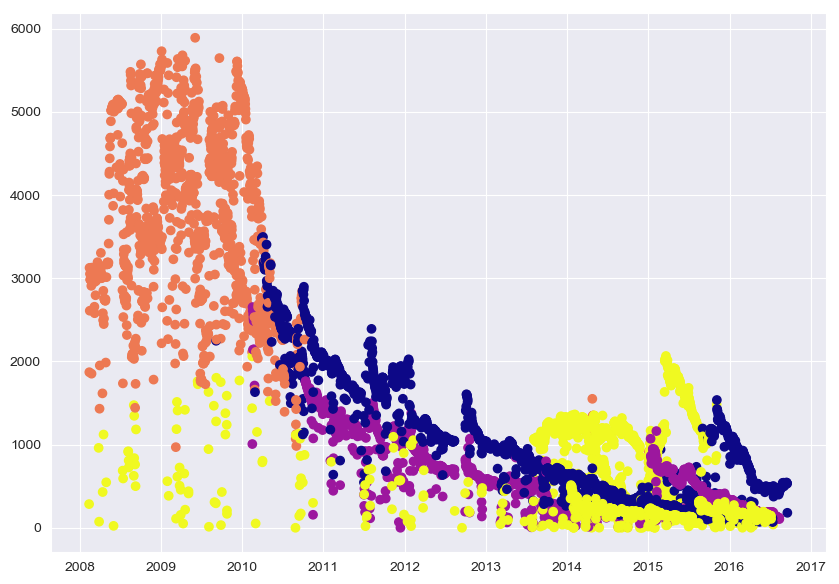

In [105]:
fig = plt.figure(figsize=(10,7))
plt.scatter(producers.index,producers['BORE_OIL_VOL'], c= producers['Cluster'], cmap='plasma')

fig.savefig('cluster2')

In [106]:
producers_date = producers_date[producers_date['BORE_OIL_VOL'] != 0]

In [107]:
producers_date = producers_date[producers_date['ON_STREAM_HRS'] == 24]

In [108]:
for column in producers_date.drop('NPD_WELL_BORE_NAME',axis=1):
    producers_date[column] = producers_date[column].apply(lambda x: np.sqrt(x))

In [109]:
producers_date['BORE_OIL_VOL'] = producers_date['BORE_OIL_VOL'].apply(lambda x: np.log(x))

In [110]:
producers_date.columns

Index(['NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',
       'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL',
       'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')

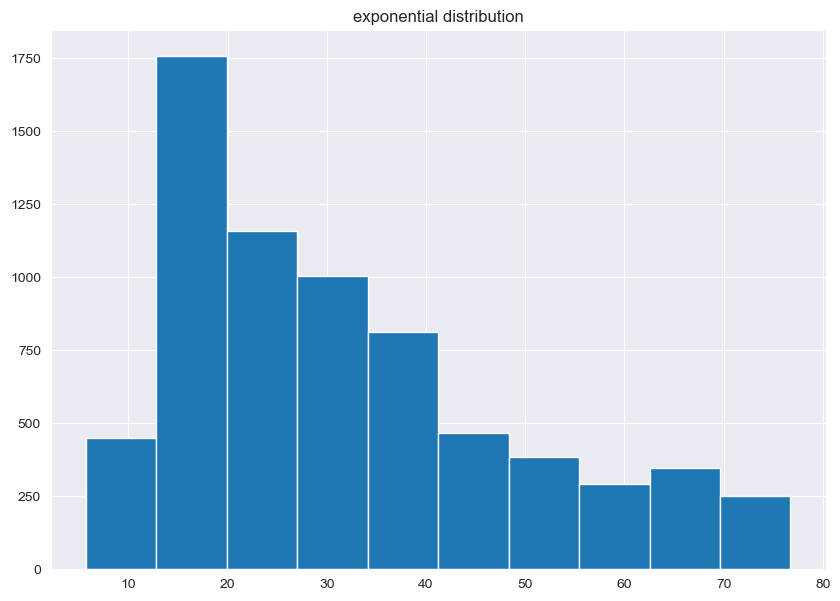

In [111]:
# dist plot produced after the fact for presentation
fig = plt.figure(figsize=(10,7))
producers_date['BORE_OIL_VOL'].apply(lambda x: np.exp(x)).hist()
plt.title("exponential distribution")

fig.savefig("exp_hist")

<br>


# Regression

In [112]:
from sklearn import metrics

In [113]:
#Reading csv file and assigning its content to variable "df" for typing convenience. 
df = pd.read_csv('Well_01_Data.csv')
df = df.drop(['AVG_ANNULUS_PRESS','BORE_WI_VOL'],axis=1)
#df = df.fillna(value='0')
df = df.dropna()

In [114]:
#Defining the independent and dependent variables.
#Bore gas volume is commented out on one run to show an r^2 of 0.75
#With a Bore gas volume r^2 is 0.99
#It shows the heavy correlation between the two
X = df[['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
        #'BORE_GAS_VOL',
        'BORE_WAT_VOL']]
y = df['BORE_OIL_VOL']

In [115]:
#This handy gem partitions the data into your train and test chunks. Random_state=False makes the split at one location (I believe). 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [116]:
#Inserting a quick call function. In this situation lm is short for Linear Regression model function.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [117]:
#Using the linear regression function, we fit training data for X and y.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
#Testing Linear Regression function. "Predictions" is the variable assigned to the model's predicted y values.
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Value')

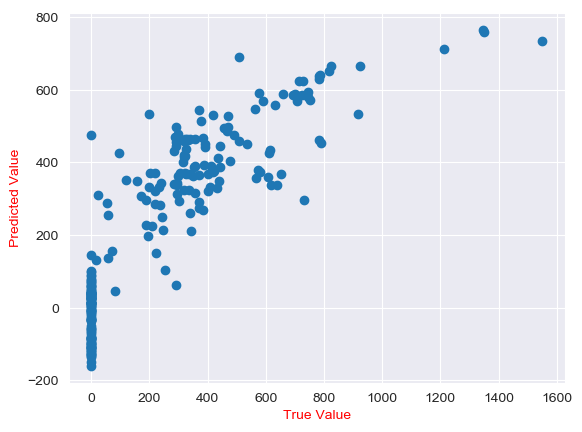

In [119]:
#Plotting predicted y_data vs test y_data
plt.scatter(y_test,predictions)
plt.xlabel('True Value',color='r')
plt.ylabel('Predicted Value',color='r')

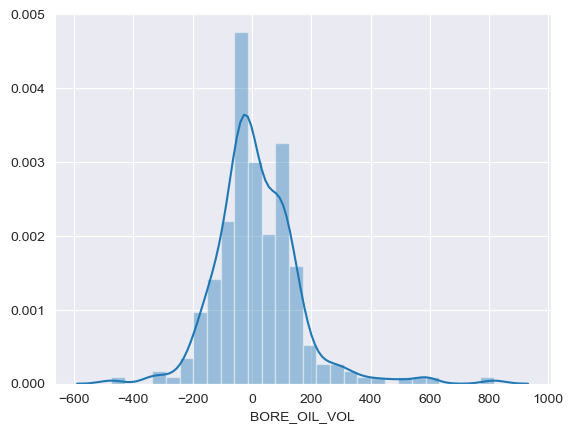

In [120]:
sns.distplot(y_test - predictions)

In [121]:
print('The mean absolute error is',metrics.mean_absolute_error(y_test,predictions))
print('The mean squared error is',metrics.mean_squared_error(y_test,predictions))
print('The root mean squared error is',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r^2 is',metrics.explained_variance_score(y_test,predictions))

The mean absolute error is 100.68728756471185
The mean squared error is 21108.17662070074
The root mean squared error is 145.2865328263454
r^2 is 0.7529824763696625
